# 1. 확률
#### -> 확률의 개념을 주사위 던지기로 설명
#### -> '공정한' 주사위를 던졌을 때 특정 숫자가 나올 확률을 시각화

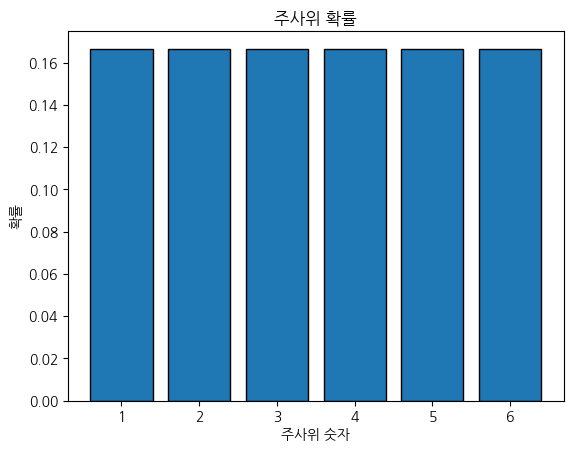

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 주사위 던지기 결과
dice_roll = np.arange(1, 7)
proba = np.full(6, 1/6)

# 확률 히스토그램
plt.bar(dice_roll, proba, edgecolor='k')
plt.title('주사위 확률')
plt.xlabel('주사위 숫자')
plt.ylabel('확률')
plt.xticks(dice_roll)
plt.show()

# 2. 가능도
#### -> 주사위를 여러 번 던진 결과를 기반으로 공정한 주사위의 가능도를 계산하고 시각화하는 예제
#### -> MLE(최대 가능도 추정법)를 사용하여 공정한 주사위와 편향된 주사위(예: 특정 숫자가 더 자주 나오는 경우) 중 어떤 모델이 데이터를 더 잘 설명하는지 평가

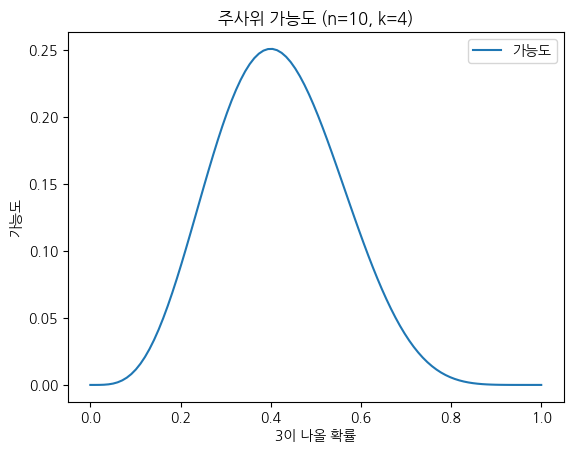

In [4]:
from scipy.stats import binom

# 주사위를 10번 던져서 3이 4번 나온 경우를 가정
n = 10
k = 4
p_value = np.linspace(0, 1, 100)

# 가능도 함수 계산 (주사위 특정 숫자가 나올 확률)
likelihood = binom.pmf(k, n, p_value)

# 가능도 시각화
plt.plot(p_value, likelihood, label='가능도')
plt.title('주사위 가능도 (n=10, k=4)')
plt.xlabel('3이 나올 확률')
plt.ylabel('가능도')
plt.legend()
plt.show()

# 3. 베이지안 추론
#### -> 사전 확률(prior), 가능도(likelihood), 사후 확률(posterior)을 시각화

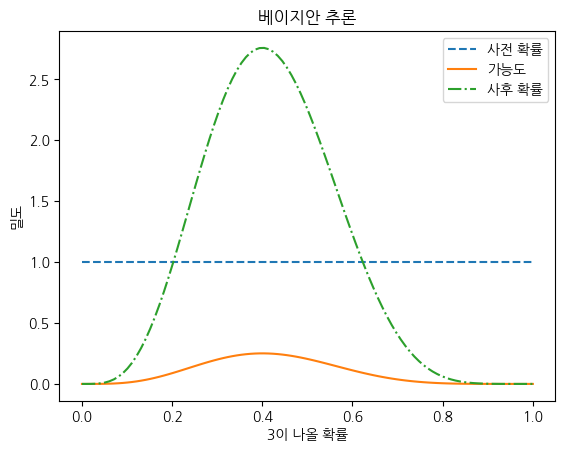

In [5]:
from scipy.stats import beta

# 사전 확률 (Uniform Distribution, 모든 p가 동일하게 가능하다고 가정)
alpha_prior = 1
beta_prior = 1
prior = beta.pdf(p_value, alpha_prior, beta_prior)

# 사후 확률 계산
posterior = beta.pdf(p_value, alpha_prior + k, beta_prior + n - k)

# 사전 확률, 가능도, 사후 확률 시각화
plt.plot(p_value, prior, label='사전 확률', linestyle='--')
plt.plot(p_value, likelihood, label='가능도')
plt.plot(p_value, posterior, label='사후 확률', linestyle='-.')
plt.title('베이지안 추론')
plt.xlabel('3이 나올 확률')
plt.ylabel('밀도')
plt.legend()
plt.show()